In [1]:
import pandas as pd

In [2]:
# loading the data

production = pd.read_csv("Production Quantity.csv")
precipitation = pd.read_csv("Daily precipitation.csv")
soil_moisture = pd.read_csv("Daily Soil Mositure.csv")
Temperature = pd.read_csv("Daily Temperature.csv")
ndvi = pd.read_csv("Eight day NDVI.csv")
preduction = pd.read_csv("predicted_production_qty.csv")

listx = [production, precipitation, soil_moisture, Temperature, ndvi, preduction]

In [3]:
len(production), len(precipitation), len(soil_moisture), len(Temperature), len(ndvi), len(preduction)

# precipitation - daily for 10 regions with precp - 29940
# soil_moisture - daily for 10 regions with soil - 29603
# Temperature - 12930
# ndvi - 3338
# production - monthly for 10 regions with qty - 720
# preduction - 120

(720, 29940, 29603, 12930, 3338, 120)

In [4]:
# start and end date modification and sorting

for df in listx :
    df['start_date'] = df['start_date'].str[:10]
    df['end_date'] = df['end_date'].str[:10]
    #df["composite"] = df["start_date"] + df["region_id"].astype(str)
    df[["start_date", "end_date"]] = df[["start_date", "end_date"]].apply(pd.to_datetime)
    df = df.sort_values(by='start_date', ascending=True)

In [5]:
# splitting date to Year, Month and Day and dropping other dates

import datetime
from datetime import date

for df in listx :
    df['Year'] = df['start_date'].dt.year
    df['Month'] = df['start_date'].dt.month
    df['Day'] = df['start_date'].dt.day
    df.drop(['start_date', 'end_date'], axis=1, inplace=True)

In [6]:
precipitation.head()

,precip,region_id,Year,Month,Day
0,1.392393,93,2014,1,1
1,0.315380,93,2014,1,2
2,2.347846,93,2014,1,3
3,21.466357,93,2014,1,4
4,32.823651,93,2014,1,5


In [7]:
precipitation['precip_new'] = precipitation.groupby(['region_id', 'Year', 'Month'])[["precip"]].transform('mean')
precipitation.drop('precip', axis=1, inplace=True)
#precipitation = precipitation.loc[precipitation['Day'] == 1] -- old strategy, doesnt work for other tables

In [8]:
precipitation.head()

,region_id,Year,Month,Day,precip_new
0,93,2014,1,1,2.541758
1,93,2014,1,2,2.541758
2,93,2014,1,3,2.541758
3,93,2014,1,4,2.541758
4,93,2014,1,5,2.541758


In [9]:
# dropping duplicates and preserving only 1 record for each month 

precipitation = precipitation.drop_duplicates(subset=['region_id', 'Year', 'Month'])
precipitation.head()

,region_id,Year,Month,Day,precip_new
0,93,2014,1,1,2.541758
31,93,2014,2,1,0.326015
59,93,2014,3,1,6.208490
90,93,2014,4,1,10.433339
120,93,2014,5,1,9.160731


In [10]:
# same strategy on other tables

soil_moisture['smos_new'] = soil_moisture.groupby(['region_id', 'Year', 'Month'])[["smos"]].transform('mean')
soil_moisture.drop('smos', axis=1, inplace=True)
soil_moisture = soil_moisture.drop_duplicates(subset=['region_id', 'Year', 'Month'])

Temperature['temp_new'] = Temperature.groupby(['region_id', 'Year', 'Month'])[["temp"]].transform('mean')
Temperature.drop('temp', axis=1, inplace=True)
Temperature = Temperature.drop_duplicates(subset=['region_id', 'Year', 'Month'])

ndvi['ndvi_new'] = ndvi.groupby(['region_id', 'Year', 'Month'])[["ndvi"]].transform('mean')
ndvi.drop('ndvi', axis=1, inplace=True)
ndvi = ndvi.drop_duplicates(subset=['region_id', 'Year', 'Month'])

In [11]:
len(production), len(precipitation), len(soil_moisture), len(Temperature), len(ndvi), len(preduction)

(720, 990, 990, 990, 993, 120)

In [12]:
precipitation['Date'] = pd.to_datetime(precipitation[['Year', 'Month', 'Day']])

C:\Users\skfar\AppData\Local\Temp\ipykernel_39644\578692725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation['Date'] = pd.to_datetime(precipitation[['Year', 'Month', 'Day']])


In [13]:
precipitation.head()

,region_id,Year,Month,Day,precip_new,Date
0,93,2014,1,1,2.541758,2014-01-01
31,93,2014,2,1,0.326015,2014-02-01
59,93,2014,3,1,6.208490,2014-03-01
90,93,2014,4,1,10.433339,2014-04-01
120,93,2014,5,1,9.160731,2014-05-01


In [14]:
soil_moisture['Date'] = pd.to_datetime(soil_moisture[['Year', 'Month', 'Day']])
Temperature['Date'] = pd.to_datetime(Temperature[['Year', 'Month', 'Day']])
production['Date'] = pd.to_datetime(production[['Year', 'Month', 'Day']])
preduction['Date'] = pd.to_datetime(preduction[['Year', 'Month', 'Day']])
ndvi['Date'] = pd.to_datetime(ndvi[['Year', 'Month', 'Day']])

C:\Users\skfar\AppData\Local\Temp\ipykernel_39644\477441692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_moisture['Date'] = pd.to_datetime(soil_moisture[['Year', 'Month', 'Day']])
C:\Users\skfar\AppData\Local\Temp\ipykernel_39644\477441692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temperature['Date'] = pd.to_datetime(Temperature[['Year', 'Month', 'Day']])
C:\Users\skfar\AppData\Local\Temp\ipykernel_39644\477441692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [15]:
ndvi.head()

,region_id,Year,Month,Day,ndvi_new,Date
0,93,2013,12,27,0.679106,2013-12-27
1,93,2014,1,1,0.740574,2014-01-01
5,93,2014,2,2,0.766015,2014-02-02
9,93,2014,3,6,0.734051,2014-03-06
11,93,2014,4,7,0.807792,2014-04-07


In [16]:
precipitation = precipitation[['region_id', 'precip_new', 'Date']]
soil_moisture = soil_moisture[['region_id', 'smos_new', 'Date']]
Temperature = Temperature[['region_id', 'temp_new', 'Date']]
production = production[['region_id', 'prod', 'Date']]
ndvi = ndvi[['region_id', 'ndvi_new', 'Date']]
preduction = preduction[['region_id','prod','Date']]

## STrategy = outer

In [18]:
combined = pd.merge(precipitation, soil_moisture, how="outer", on=["Date", 'region_id'])
combined = pd.merge(combined, Temperature, how="outer", on=["Date", 'region_id'])
combined = pd.merge(combined, ndvi, how="outer", on=["Date", 'region_id'])
combined = pd.merge(combined, production, how="outer", on=["Date", 'region_id'])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2304 entries, 0 to 2303
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   region_id   2304 non-null   int64         
 1   precip_new  990 non-null    float64       
 2   Date        2304 non-null   datetime64[ns]
 3   smos_new    990 non-null    float64       
 4   temp_new    990 non-null    float64       
 5   ndvi_new    993 non-null    float64       
 6   prod        720 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 144.0 KB


In [19]:
combined = combined.set_index("Date")
region_93 = combined.loc[combined['region_id'] == 93]

<AxesSubplot:xlabel='Date'>

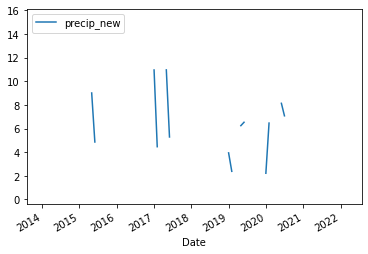

In [20]:
region_93.plot( y='precip_new')

<AxesSubplot:xlabel='Date'>

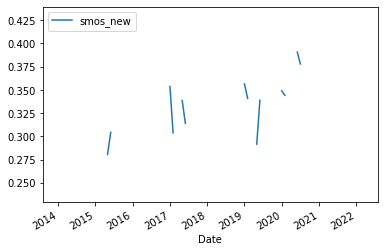

In [77]:
region_93.plot( y='smos_new')

<AxesSubplot:xlabel='Date'>

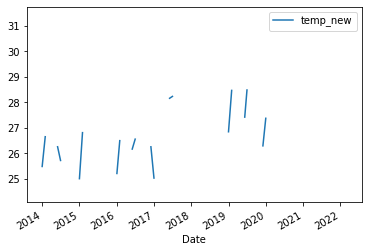

In [78]:
region_93.plot( y='temp_new')

<AxesSubplot:xlabel='Date'>

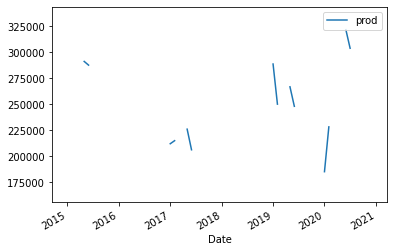

In [79]:
region_93.plot( y='prod')

## Strategy = left

In [21]:
len(production), len(precipitation), len(soil_moisture), len(Temperature), len(ndvi), len(preduction)

(720, 990, 990, 990, 993, 120)

In [22]:
combined2 = pd.merge(precipitation, soil_moisture, how="left", on=["Date", 'region_id'])
combined2 = pd.merge(combined2, Temperature, how="left", on=["Date", 'region_id'])
combined2 = pd.merge(combined2, ndvi, how="left", on=["Date", 'region_id'])
combined2 = pd.merge(combined2, production, how="left", on=["Date", 'region_id'])
combined2.head()

,region_id,precip_new,Date,smos_new,temp_new,ndvi_new,prod
0,93,2.541758,2014-01-01,0.287870,NaN,0.740574,NaN
1,93,0.326015,2014-02-01,0.272979,26.647786,NaN,NaN
2,93,6.208490,2014-03-01,0.254618,NaN,NaN,NaN
3,93,10.433339,2014-04-01,0.277936,NaN,NaN,NaN
4,93,9.160731,2014-05-01,0.238466,NaN,0.812885,NaN


In [23]:
combined2 = combined2.set_index("Date")
region_93 = combined2.loc[combined2['region_id'] == 93]

<AxesSubplot:xlabel='Date'>

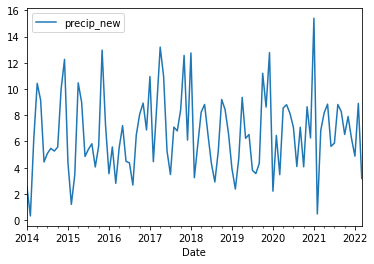

In [27]:
region_93.plot( y='precip_new')

<AxesSubplot:xlabel='Date'>

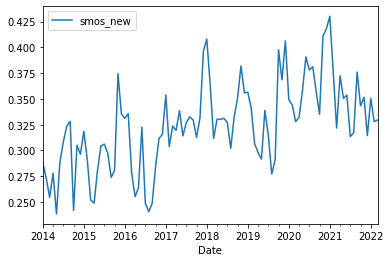

In [28]:
region_93.plot( y='smos_new')

<AxesSubplot:xlabel='Date'>

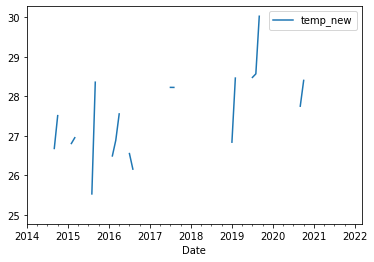

In [29]:
region_93.plot( y='temp_new')

<AxesSubplot:xlabel='Date'>

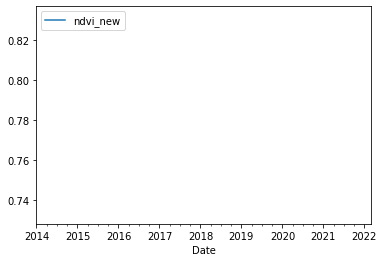

In [31]:
region_93.plot( y='ndvi_new')